In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
!pip install split-folders pillow ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 127.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:

from roboflow import Roboflow
rf = Roboflow(api_key="4kCXQVv3472M9OQVjdSg")
project = rf.workspace("pelota-fzva7").project("spalling-7ltve")
version = project.version(5)
dataset = version.download("yolov11")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Spalling--5 in yolov11:: 100%|██████████| 409/409 [00:00<00:00, 6344.34it/s]


In [ ]:
# Specify the path to the file
file_path = '/content/Spalling--5/data.yaml'

# Check if the file exists
if os.path.exists(file_path):
    print(f"The file at {file_path} exists.")
else:
    print(f"The file at {file_path} does not exist.")

The file at /content/Spalling--5/data.yaml exists.


In [ ]:
# Get the current working directory
cwd = os.getcwd()
print(f"Current working directory: {cwd}")

# List all files and directories in the current directory
files = os.listdir(cwd)
print(f"Files and directories in '{cwd}': {files}")

Current working directory: /content
Files and directories in '/content': ['.config', 'Spalling--5', 'sample_data']


In [ ]:
dir_path = cwd + "/sample_data"
for files in os.listdir(dir_path):
  os.remove(dir_path + "/" + files)
os.rmdir(dir_path)

In [ ]:
from ultralytics import YOLO
model = YOLO("yolo11l.pt")
model.info()

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
YOLO11l summary: 357 layers, 25,372,160 parameters, 0 gradients, 87.6 GFLOPs


(357, 25372160, 0, 87.6134912)

In [ ]:
from ultralytics import settings

# View all settings

settings.update({'datasets_dir': '/content/Spalling--5'})

In [ ]:
# os.chdir("/content")
# Entrenar el modelo
model.train(
    data='/content/Spalling--5/data.yaml',
    epochs=200,
    imgsz=640,
    batch=5,  # Ajusta según tu GPU
    name="entrenamiento_spalling_masonry",
    project="proyecto_spalling"
)

Ultralytics 8.3.200 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=5, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Spalling--5/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=entrenamiento_spalling_masonry, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a55dd10b860>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
import os

# Listar archivos en el directorio
directory = "/content/proyecto_spalling/entrenamiento_spalling_masonry"
if os.path.exists(directory):
    print("Archivos en el directorio:")
    print(os.listdir(directory))
else:
    print(f"El directorio {directory} no existe.")

Archivos en el directorio:
['weights', 'train_batch6461.jpg', 'confusion_matrix.png', 'results.png', 'args.yaml', 'BoxR_curve.png', 'val_batch1_pred.jpg', 'val_batch2_pred.jpg', 'train_batch6460.jpg', 'BoxF1_curve.png', 'train_batch2.jpg', 'results.csv', 'BoxPR_curve.png', 'val_batch1_labels.jpg', 'train_batch6462.jpg', 'confusion_matrix_normalized.png', 'val_batch2_labels.jpg', 'val_batch0_labels.jpg', 'train_batch1.jpg', 'labels.jpg', 'train_batch0.jpg', 'BoxP_curve.png', 'val_batch0_pred.jpg']


In [ ]:
# Crear DataFrame de métricas de entrenamiento
df_metrics = pd.read_csv("/content/proyecto_spalling/entrenamiento_spalling_masonry/results.csv")


# Mostrar algunas métricas
print(df_metrics.head(5))

print(df_metrics.index.to_list())
print(df_metrics.columns.to_list())

df_metrics.describe()

   epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1  18.7234         1.89273         3.69965         1.95251   
1      2  24.7311         2.18697         3.27900         2.12657   
2      3  30.5522         2.25024         3.42441         2.20619   
3      4  36.3731         2.55346         3.24799         2.60633   
4      5  42.1047         2.42689         2.92193         2.44139   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.01721            0.10417           0.00506   
1               0.00011            0.02083           0.00006   
2               0.00000            0.00000           0.00000   
3               0.00000            0.00000           0.00000   
4               0.00000            0.00000           0.00000   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.00135        2.6482       11.4613       2.93457  0.000647   
1              0.00001           NaN        

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,195.000000,195.000000,195.000000,200.000000,200.000000,200.000000
mean,100.500000,606.365586,1.149282,1.167521,1.421246,0.799136,0.681656,0.749018,0.525862,1.230042,1.771693,1.829369,0.001005,0.001005,0.001005
std,57.879185,342.200180,0.398557,0.586524,0.304481,0.219057,0.174741,0.210743,0.176559,0.457712,3.380421,2.680441,0.000565,0.000565,0.000565
min,1.000000,18.723400,0.607130,0.491080,1.041760,0.000000,0.000000,0.000000,0.000000,0.903630,0.728960,1.359740,0.000030,0.000030,0.000030
25%,50.750000,311.936500,0.844078,0.733200,1.181390,0.799913,0.666670,0.761645,0.491202,0.975955,0.855595,1.458010,0.000522,0.000522,0.000522
50%,100.500000,605.809000,1.062300,0.990910,1.336835,0.874625,0.737230,0.832935,0.589650,1.100660,0.996870,1.527750,0.001005,0.001005,0.001005
75%,150.250000,901.318750,1.372463,1.453475,1.574318,0.915240,0.791670,0.858890,0.641915,1.288180,1.349845,1.692885,0.001488,0.001488,0.001488
max,200.000000,1194.880000,2.553460,3.699650,2.606330,1.000000,0.858460,0.885470,0.694860,5.416180,27.150600,38.828600,0.001970,0.001970,0.001970


['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']


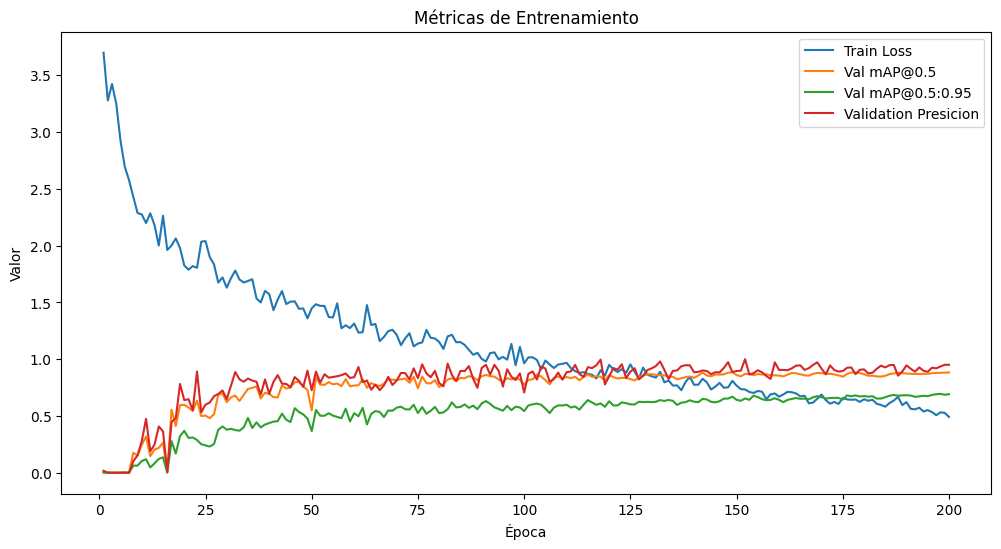

In [ ]:
print(df_metrics.columns.to_list())
# Graficar las métricas
plt.figure(figsize=(12, 6))
plt.plot(df_metrics[['epoch']], df_metrics[['train/cls_loss']], label='Train Loss')
plt.plot(df_metrics[['epoch']], df_metrics[['metrics/mAP50(B)']], label='Val mAP@0.5')
plt.plot(df_metrics[['epoch']], df_metrics[['metrics/mAP50-95(B)']], label='Val mAP@0.5:0.95')
plt.plot(df_metrics[['epoch']], df_metrics[['metrics/precision(B)']], label='Validation Presicion')
plt.xlabel('Época')
plt.ylabel('Valor')
plt.title('Métricas de Entrenamiento')
plt.legend()
plt.show()

In [ ]:
# Evaluar el modelo
results = model.val()

# Mostrar los resultados
print(results)

Ultralytics 8.3.200 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11l summary (fused): 190 layers, 25,280,083 parameters, 0 gradients, 86.6 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1459.0±335.2 MB/s, size: 78.0 KB)
val: Scanning /content/Spalling--5/valid/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 30/30 17.7Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 6/6 10.0it/s 0.6s
                   all         30         48      0.936      0.792       0.88      0.692
Speed: 1.2ms preprocess, 7.4ms inference, 0.0ms loss, 5.0ms postprocess per image
Results saved to /content/proyecto_spalling/entrenamiento_spalling_masonry2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a509d7a5790>
curves: 

In [ ]:
# Cargar el modelo entrenado
# modelo_entrenado = YOLO("/content/yolov8n.pt")
modelo_entrenado = YOLO("/content/proyecto_spalling/entrenamiento_spalling/weights/best.pt")

# Realizar inferencia en una imagen
resultados = modelo_entrenado.predict(source="/content/Spalling--4/valid/images/c19_jpg.rf.7e9abdfb0a0ba210c75d604a25e9fcae.jpg", save=True)

# Acceder a los resultados
for resultado in resultados:
    print(f"Predicciones para la imagen: {resultado.path}")

    for caja, conf, clase in zip(resultado.boxes.xyxy, resultado.boxes.conf, resultado.boxes.cls):
        print(f"Bounding Box: {caja} - Confianza: {conf} - Clase: {clase}")


image 1/1 /content/Spalling--4/valid/images/c19_jpg.rf.7e9abdfb0a0ba210c75d604a25e9fcae.jpg: 640x640 3 Spallings, 18.7ms
Speed: 1.8ms preprocess, 18.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict
Predicciones para la imagen: /content/Spalling--4/valid/images/c19_jpg.rf.7e9abdfb0a0ba210c75d604a25e9fcae.jpg
Bounding Box: tensor([174.4007, 281.0423, 251.2380, 385.1663], device='cuda:0') - Confianza: 0.7824596166610718 - Clase: 0.0
Bounding Box: tensor([183.3297,  11.2266, 210.2927,  57.3911], device='cuda:0') - Confianza: 0.7707902789115906 - Clase: 0.0
Bounding Box: tensor([128.1577, 406.4139, 345.7083, 640.0000], device='cuda:0') - Confianza: 0.5258879065513611 - Clase: 0.0


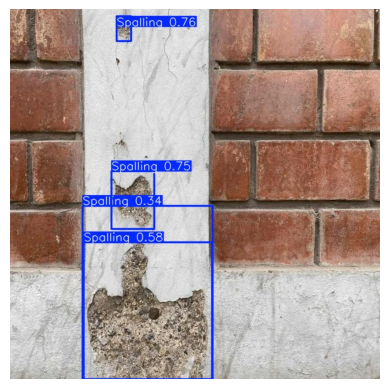

In [ ]:
# Cargar y mostrar la imagen con las predicciones
img = Image.open("/content/runs/detect/predict2/c19_jpg.rf.7e9abdfb0a0ba210c75d604a25e9fcae.jpg")
plt.imshow(img)
plt.axis('off')  # Ocultar los ejes
plt.show()

In [ ]:
import shutil
from google.colab import files

# Especifica el nombre de la carpeta que deseas comprimir y descargar
folder_path = "/content/proyecto_spalling"  # Ruta de la carpeta en Colab
output_filename = "version3.zip"   # Nombre del archivo zip de salida

# Comprimir la carpeta en un archivo ZIP
shutil.make_archive(output_filename.replace('.zip', ''), 'zip', folder_path)

# Descargar el archivo ZIP
files.download(output_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#HOLA

In [ ]:
#drive
from google.colab import drive
drive.mount('/content/drive')
#ruta
dataset_path = "/content/drive/MyDrive/dataset_spalling"

In [ ]:
#ultralytics
pip install -U ultralytics


In [ ]:
#yolo
from ultralytics import YOLO


In [ ]:
#modelo
model = YOLO("yolo11n.pt")

#hiperparámetros
results = model.train(
    data=f"{dataset_path}/data.yaml",  # ruta
    epochs=100,
    imgsz=640,
    batch=16,
    device=0,        # 0 = GPU
    pretrained=True
)

In [ ]:
#validar
metrics = model.val()


In [ ]:
results = model.predict(
    source=f"{dataset_path}/images/val",
    conf=0.25,
    save=True
)